<a href="https://colab.research.google.com/github/rgmantovani/advancedML/blob/master/codes/aula_08_ds_flow/Regression_exemplo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solução de Problemas Reais

Disciplina: Métodos e Modelos Avançados em Ciênc
ia de Dados

Especialização em Ciência de Dados - Universidade Tecnologica Federal do Paraná

**Aula 08:** Fluxo de DS para solução de problemas reais

**Exemplo 02:** Exemplo de problema de regressão

by: Rafael G. Mantovani

---

---
## Descrição geral do exemplo

**Objetivo**: Comparar diferentes algoritmos na resolução de um problema de regressão. O exemplo envolve os seguintes passos de abstração:

1. Definir todo o ambiente de experimentação do script com os imports necessários;

2. Obter o conjunto de dados de imagem para o exemplo. 
Aqui vamos usar o [Boston Housing Price](https://keras.io/api/datasets/boston_housing/), que preve o preço de casas em Boston na década de 1970. O dataset tem 13 atributos descritivos, e um atributo preditivo contínuo correspondente ao preço médio das casas em cada localidade. Como o atributo preditivo é contínuo (números reais), temos uma tarefa de regressão.

4. Definir MLP com uma única camada oculta. Usaremos a implementação do scikir-learn.

5. Iremos usar validação cruazada no conjunto de treinamento, para obter estimativas mais precisas, e menor variância nos resultados.

6. Iremos definir dois baselines: Random Forest (RF), e k-Nearest Neighbors (k-NN). Compararemos os modelos nos conjuntos de validação e teste.

Detalhes mais específicos serão incluídos nos correspondentes trechos de código.

---


In [115]:
#import de todas as bibliotecas necessárias para o script funcionar
import numpy as np                 # manipulacao de números na notação científica
import pandas as pd                # data frames
import random                      # números aleatórios

# imports de sub-módulos do keras
from keras.datasets import boston_housing 

# import de sub-módulos do scikit-learn
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

# matplotlib - plot/graficos
import matplotlib.pyplot as plt

In [116]:
# seed para reprodução dos experimentos
mySeed = 42
np.random.seed(mySeed)
random.seed(mySeed)

In [117]:
# Obter o dataset boston housing via keras, e dividir as amostras em conjuntos
# distintos de treino e teste
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(seed = mySeed)

In [118]:
# ver nosso conjunto de treinamento
df_train = pd.DataFrame(x_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27


In [119]:
# vendo nosso target (numérico e contínuo)
print(y_train)

[23.6 32.4 13.6 22.8 16.1 20.  17.8 14.  19.6 16.8 21.5 18.9  7.  21.2
 18.5 29.8 18.8 10.2 50.  14.1 25.2 29.1 12.7 22.4 14.2 13.8 20.3 14.9
 21.7 18.3 23.1 23.8 15.  20.8 19.1 19.4 34.7 19.5 24.4 23.4 19.7 28.2
 50.  17.4 22.6 15.1 13.1 24.2 19.9 24.  18.9 35.4 15.2 26.5 43.5 21.2
 18.4 28.5 23.9 18.5 25.  35.4 31.5 20.2 24.1 20.  13.1 24.8 30.8 12.7
 20.  23.7 10.8 20.6 20.8  5.  20.1 48.5 10.9  7.  20.9 17.2 20.9  9.7
 19.4 29.  16.4 25.  25.  17.1 23.2 10.4 19.6 17.2 27.5 23.  50.  17.9
  9.6 17.2 22.5 21.4 12.  19.9 19.4 13.4 18.2 24.6 21.1 24.7  8.7 27.5
 20.7 36.2 31.6 11.7 39.8 13.9 21.8 23.7 17.6 24.4  8.8 19.2 25.3 20.4
 23.1 37.9 15.6 45.4 15.7 22.6 14.5 18.7 17.8 16.1 20.6 31.6 29.1 15.6
 17.5 22.5 19.4 19.3  8.5 20.6 17.  17.1 14.5 50.  14.3 12.6 28.7 21.2
 19.3 23.1 19.1 25.  33.4  5.  29.6 18.7 21.7 23.1 22.8 21.  48.8 14.6
 16.6 27.1 20.1 19.8 21.  41.3 23.2 20.4 18.5 29.4 36.4 24.4 11.8 13.8
 12.3 17.8 33.1 26.7 13.4 14.4 50.  22.  19.9 23.8 17.5 12.7  5.6 31.1
 26.2 

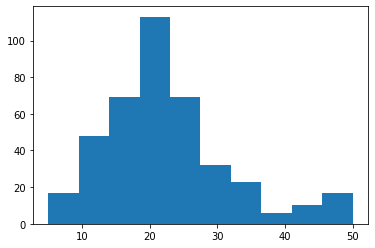

In [120]:
# distribuição dos valores, visto por um histograma
plt.hist(x = y_train)
plt.show()

In [121]:
# formato (quantidade de exemplos) de cada conjunto (treino/teste)
print(f'Training data : {x_train.shape}')
print(f'Test data :     {x_test.shape}')

Training data : (404, 13)
Test data :     (102, 13)


In [122]:
# normalizando nosso conjunto de dados para trabalhar com a MLP
# a normalização é feita com base na média e desvio padrão
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

# replicar a normalização tanto no treino como no teste
x_train_normalized = (x_train - mean)/ std
x_test_normalized  = (x_test - mean) / std

In [123]:
# ver os dados normalizados (transformados)
df_train = pd.DataFrame(x_train_normalized)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.405441,-0.477239,-1.035735,-0.272888,-0.382958,0.181467,0.535027,-0.535495,-0.534184,-0.666531,-0.873427,0.426420,-0.518584
1,-0.409315,1.172954,-0.694541,3.664502,-0.924830,0.654586,-1.293552,0.133337,-0.648794,-0.914355,-0.409315,0.441646,-1.273408
2,-0.403910,-0.477239,2.389217,-0.272888,0.468556,-0.417540,1.060029,-0.899140,-0.648794,1.782207,0.750966,0.367797,0.718449
3,-0.405456,-0.477239,-0.058416,-0.272888,-1.217269,-0.304103,-2.189984,0.698618,-0.648794,-0.613426,0.333265,0.376498,-1.000794
4,0.142541,-0.477239,0.995526,-0.272888,1.363076,0.016844,0.810028,-0.665448,1.643403,1.516681,0.797377,0.313199,0.608856


In [124]:
# Na maioria dos exemplos sempre executamos o treinamento/validação usando holdout, 
# ou seja, uma única divisão entre treino e teste
# Porém, agora vamos usar validação cruzada com 10 partiçoes
# Mais detalhes, ver:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py

# Definimos dez permutações de treino/teste
kfold = KFold(n_splits=10, shuffle = True, random_state = mySeed)

In [125]:
mlp_regressor = MLPRegressor()
print(mlp_regressor)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)


In [126]:
# executamos 10 iterações, e em cada uma delas usando um diferente conjunto para validação
# MLP usando os dados normalizados
mlp_results = cross_val_score(estimator = mlp_regressor, X = x_train_normalized, y = y_train, cv = kfold, scoring = 'neg_mean_absolute_error') 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [127]:
print(mlp_results)
print("Results: %.2f (%.2f) MAE" % (mlp_results.mean(), mlp_results.std()))

[-3.76437496 -3.64197212 -4.11592157 -4.70987168 -2.9629993  -3.80604672
 -2.95996041 -4.18566157 -4.35473404 -4.48405696]
Results: -3.90 (0.56) MAE


In [128]:
# Baseline: Ensemble de árvores (Random Forest)
rf_regressor = RandomForestRegressor(n_estimators = 100)
print(rf_regressor)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [129]:
rf_results = cross_val_score(estimator = rf_regressor, X = x_train, y = y_train, cv = kfold, scoring = 'neg_mean_absolute_error', verbose = 1) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.5s finished


In [130]:
print(rf_results)
print("Results: %.2f (%.2f) MAE" % (rf_results.mean(), rf_results.std()))

[-2.49307317 -2.12102439 -2.05336585 -2.44021951 -2.486025   -2.6235
 -1.81245    -2.765075   -2.265      -2.5927    ]
Results: -2.37 (0.28) MAE


In [131]:
knn_regressor = KNeighborsRegressor()
print(knn_regressor)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


In [132]:
# KNN usa os dados normalizados tb
knn_results = cross_val_score(estimator = knn_regressor, X = x_train_normalized, y = y_train, cv = kfold, scoring = 'neg_mean_absolute_error', verbose = 1) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [133]:
print(knn_results)
print("Results: %.2f (%.2f) MAE" % (knn_results.mean(), knn_results.std()))

[-3.44146341 -2.70829268 -3.14097561 -3.46926829 -2.826      -2.7245
 -2.4285     -3.346      -2.798      -3.0805    ]
Results: -3.00 (0.33) MAE


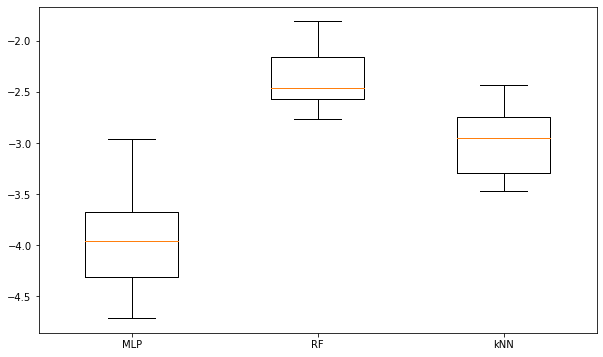

In [134]:
# Comparando as performances nos conjunto de treinament/validacao
plt.figure(figsize=(10,6))
box_data = [mlp_results, rf_results, knn_results]
plt.boxplot(box_data, widths = 0.5)
plt.xticks([1, 2, 3], ['MLP', 'RF', 'kNN'])
# ax7.boxplot(box_data)
plt.show()

---

# Avaliar ambos modelos no conjunto de teste

In [135]:
# Treinar MLP no conjunto de treinamento total
mlp_obj = mlp_regressor.fit(x_train_normalized, y_train)
mlp_pred = mlp_regressor.predict(x_test_normalized)
print(mlp_pred)

[20.25717776 29.44833393 17.44340927 24.77302695 15.50987    15.0761018
 30.48194437 25.84187159 22.38877415 27.01673077 36.28343221 28.6776615
 27.13386452 16.26016722 29.61936606 22.23206813 33.65725269 16.99013066
 25.99960384 17.72660516 27.5928802  17.51882843 20.14684774 18.28208183
 11.1546953  29.15469219 20.72018369  6.09151966 13.25453887 33.54248838
  8.46235426 19.7679032  29.66449036 21.92406341 16.45411719 30.71528388
 20.45484417 35.01503319 20.42398063 19.13408596 18.53728144 35.70019852
 11.3360152  36.76596115 36.67444264 20.84181918 17.63020262 14.5486982
 33.68177686 14.89961067 18.56477512 27.23545948 10.41982379 21.67350742
 21.8226692  18.76971039 24.55692559 12.63392402 32.00512515 24.30858541
 19.61635385 28.71182161 19.8220838  20.86258095  9.05521556 25.96900274
 19.92369471 28.15841691 16.44817049 25.25754437 17.30336112 29.04206932
 32.52058148 17.52625531 29.00137375 12.94063941 25.18267548 11.40754392
 23.11900052 47.76200638 29.77385931 15.68111024 21.22

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [136]:
# Treinar RF no conjunto de treinamento total
rf_obj = rf_regressor.fit(x_train, y_train)
# prever no teste
rf_pred = rf_regressor.predict(x_test)
print(rf_pred)

[21.29  26.463 20.206 28.715 20.267 20.481 32.173 23.621 21.62  22.358
 44.371 24.674 24.393 10.597 30.125 20.958 29.866 18.892 20.868 11.377
 23.274 14.49  14.377 19.731 11.896 26.609 21.739 14.154 13.726 31.797
 15.743 19.455 23.08  20.557 19.381 26.088 19.768 35.304 20.835 20.356
 19.432 31.291  9.338 41.055 47.633 21.217 20.004 15.15  36.808 19.083
 20.982 24.47  18.924 19.152 20.49  20.297 21.173  9.796 33.638 22.107
 22.566 27.267 22.326 23.382 18.253 30.372 22.466 32.662 18.858 23.276
 19.268 25.937 34.504 14.669 28.485  9.647 22.975 13.962 26.3   45.259
 31.074 14.342 19.047 18.852 20.763 33.862 41.401 22.535 14.971 22.269
 18.267 14.66  22.705 21.312 14.675 29.585 21.779 17.765 21.076 25.684
 11.776 19.574]


In [137]:
# Treinar kNN no conjunto de treinamento total
knn_obj = knn_regressor.fit(x_train_normalized, y_train)
# prever no teste
knn_pred = knn_regressor.predict(x_test_normalized)
print(knn_pred)

[22.08 24.94 16.82 24.34 20.84 21.58 26.36 24.9  24.7  22.44 26.98 24.46
 23.84 12.88 29.34 20.88 37.42 19.8  21.72 12.   23.5  15.8  12.62 20.56
 11.12 26.8  23.62 13.54 14.54 38.48 11.   18.36 25.68 19.54 22.04 23.44
 20.86 38.48 22.   19.08 18.88 32.12 10.6  33.6  34.36 21.6  19.12 15.92
 32.24 20.48 22.46 23.74 20.12 32.44 19.68 16.68 26.38 10.04 29.96 20.4
 18.64 29.8  21.46 23.8  17.22 30.02 21.9  25.3  16.48 20.8  16.82 26.96
 33.12 13.8  26.02 11.24 23.88 12.06 24.32 42.34 26.28 17.78 19.16 19.08
 18.4  37.86 32.44 23.4  16.04 20.64 20.28 13.08 20.   20.18 14.22 27.52
 22.54 18.46 21.14 25.72 10.38 15.64]


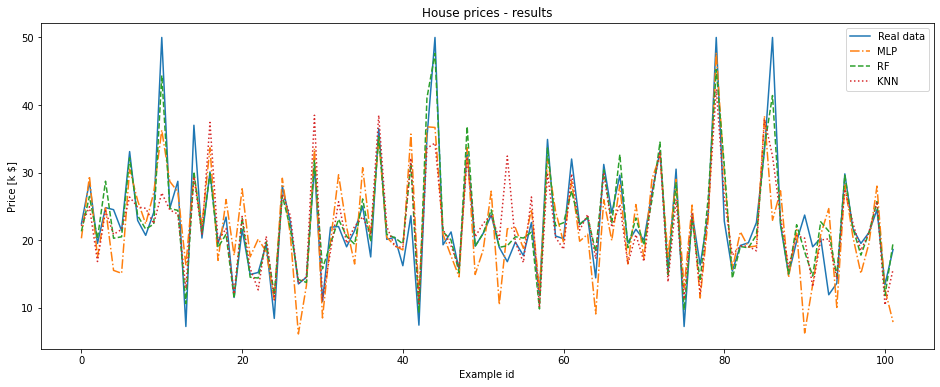

In [138]:
# Plotando as predições
plt.figure(figsize=(16,6))
plt.plot(np.arange(0, len(y_test), 1), y_test, "-")
plt.plot(np.arange(0, len(y_test), 1), mlp_pred, "-.")
plt.plot(np.arange(0, len(y_test), 1), rf_pred, "--")
plt.plot(np.arange(0, len(y_test), 1), knn_pred, ':')
plt.title("House prices - results")
plt.ylabel("Price [k $]")
plt.xlabel("Example id")
plt.legend(["Real data", "MLP", "RF", "KNN"]);
plt.show()


---

Algumas mudanças que podem melhorar a solução:
1. realizar seleção de features
2. Realizar o tuning do algoritmo de regressão
3. Testar diferentes algoritmos

Bons estudos :)